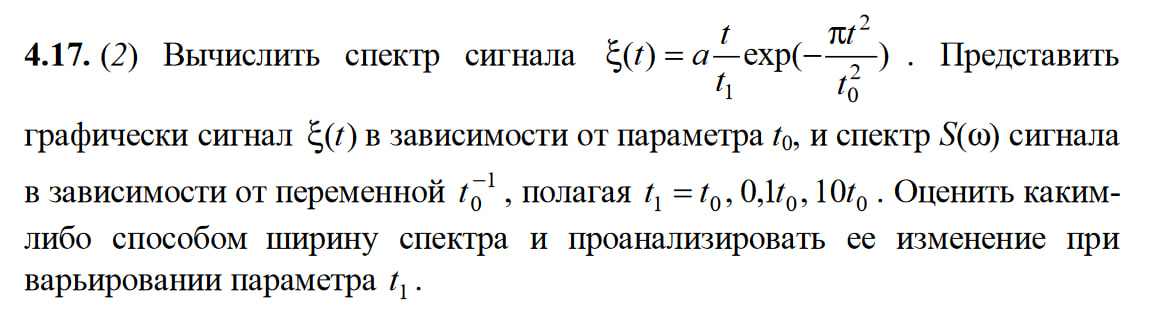

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Сигнал ξ(t)

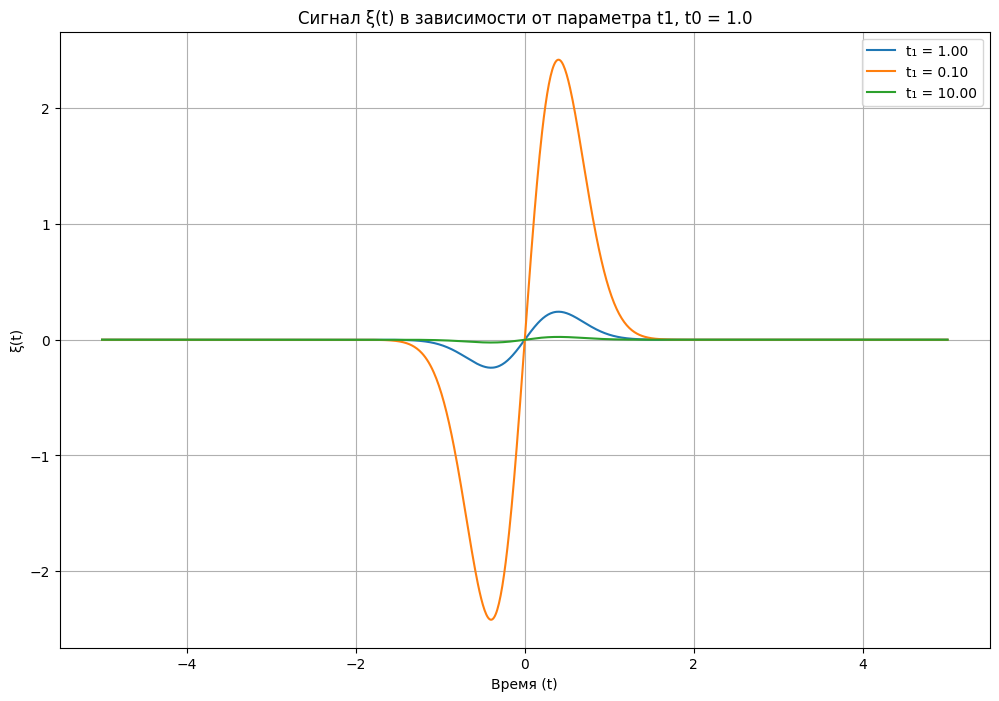

In [34]:
a = 1.0
t_0 = 1.0
t_1_values = [t_0, 0.1 * t_0, 10 * t_0]
t = np.linspace(-5 * t_0, 5 * t_0, 1000)
dt = t[1] - t[0]

def xi(t, t_1):
    return a * (t / t_1) * np.exp(-np.pi * (t ** 2) / (t_0 ** 2))

plt.figure(figsize=(12, 8))
for t_1 in t_1_values:
    plt.plot(t, xi(t, t_1), label=f't₁ = {t_1:.2f}')
plt.title('Сигнал ξ(t) в зависимости от параметра t1, t0 = 1.0')
plt.xlabel('Время (t)')
plt.ylabel('ξ(t)')
plt.legend()
plt.grid()
plt.savefig('signal_plot.png', dpi=300)
plt.show()

# Спектр S(ω)

$$ S(\omega) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} \xi(t)e^{-i\omega t} dt = \frac{1}{2\pi} \int_{-\infty}^{+\infty} a \frac{t}{t_1} e^{-\frac{\pi t^2}{t_0^2}} e^{-i\omega t} d t$$

Сделаем замену:
$$ z = t + \frac{i \omega t_0^2}{2\pi} \quad \text{и} \quad dz = dt  $$

$$ S(\omega) = \frac{a}{2\pi t_1} e^{\frac{-\omega^2 t_0^2}{4\pi}} \frac{1}{4\pi} \int_{-\infty}^{+\infty} \left( z - \frac{i \omega t_0^2}{2\pi} \right) e^{-\frac{\pi z^2}{t_0^2}} dz $$

$$ S(\omega) = \frac{a}{2\pi t_1}e^{\frac{-\omega^2 t_0^2}{4\pi}} \left( \int_{-\infty}^{+\infty} z e^{-\frac{\pi z^2}{t_0^2}} dz - \frac{i \omega t_0^2}{2\pi} \int_{-\infty}^{+\infty} e^{-\frac{\pi z^2}{t_0^2}} dz \right) $$

Первый интеграл в скобках обращается в ноль, так как это нечетная функция (нечетная * четная):
$$ S(\omega) = \frac{a}{4\pi^2 t_1} e^{\frac{-\omega^2 t_0^2}{4\pi}} \left( -i \omega t_0^2 \int_{-\infty}^{+\infty} e^{-\frac{\pi z^2}{t_0^2}} dz \right) $$

Сделаем замену:
$$ p = \frac{\sqrt{\pi}}{t_0} z \quad \text{и} \quad dp = \frac{\sqrt{\pi}}{t_0} dz $$

$$ \int_{-\infty}^{+\infty} e^{-\frac{\pi z^2}{t_0^2}} dz = \frac{t_0} {\sqrt{\pi}} \int_{-\infty}^{+\infty} e^{-p^2} dp = (\text{интеграл Пуассона})  =  \frac{t_0} {\sqrt{\pi}} \sqrt{\pi} = t_0 $$

$$ S(\omega) = -\frac{i}{4\pi^2 t_1} a \omega t_0^3 e^{\frac{-\omega^2 t_0^2}{4\pi}} $$

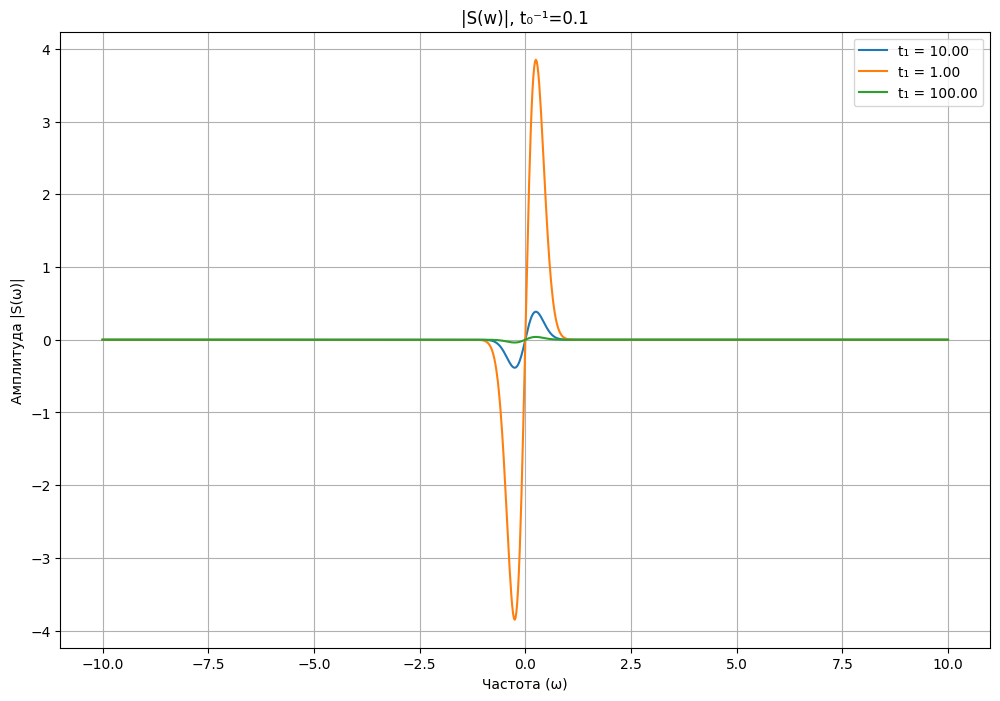

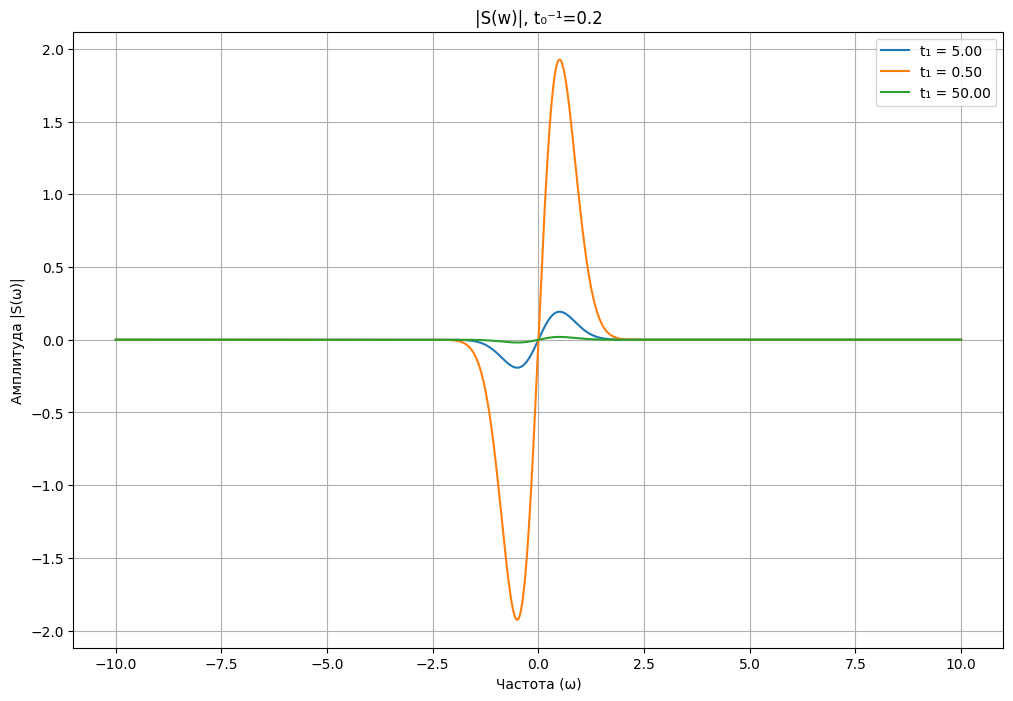

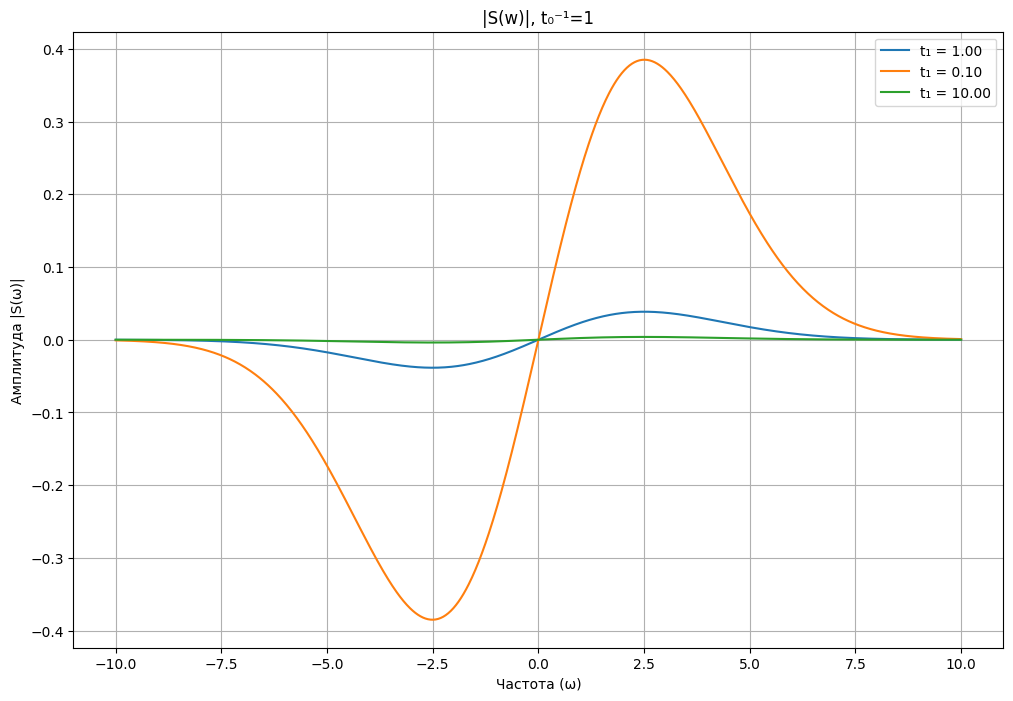

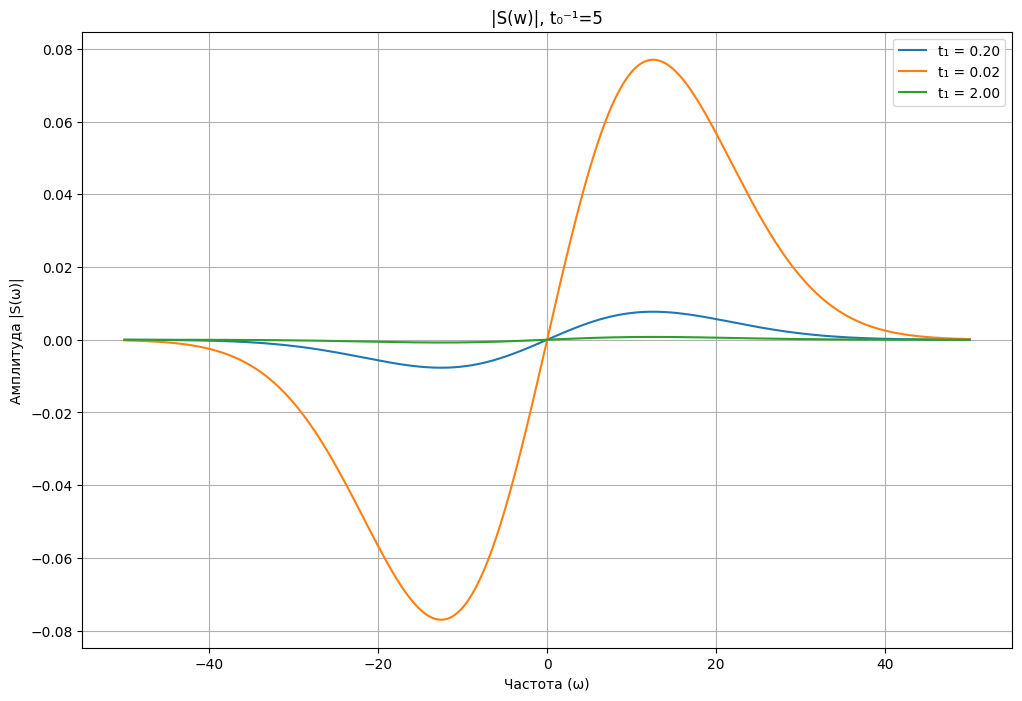

In [35]:
def S(w, t_0, t_1):
    a = 1
    return ((a * w * t_0**3) / (4 * np.pi**2 * t_1)) * np.exp((-(w**2) * t_0**2) / (4 * np.pi))

def plot_s(t_0, title, save_filename, w_range=(-10, 10)):
    t_1_values = [t_0, 0.1 * t_0, 10 * t_0]
    w = np.linspace(*w_range, 1000)

    plt.figure(figsize=(12, 8))

    for t_1 in t_1_values:
        s_values = S(w, t_0, t_1)
        plt.plot(w, s_values, label=f't₁ = {t_1:.2f}')

    plt.title(f'|S(w)|, {title}')
    plt.xlabel('Частота (ω)')
    plt.ylabel('Амплитуда |S(ω)|')
    plt.legend()
    plt.grid()
    plt.savefig(save_filename, bbox_inches='tight')
    plt.show()

plot_s(10.0, 't₀⁻¹=0.1', 'spectrum_t0_10.png')
plot_s(5.0, 't₀⁻¹=0.2', 'spectrum_t0_5.png')
plot_s(1.0, 't₀⁻¹=1', 'spectrum_t0_1.png')
plot_s(0.2, 't₀⁻¹=5', 'spectrum_t0_0.2.png', w_range=(-50, 50))

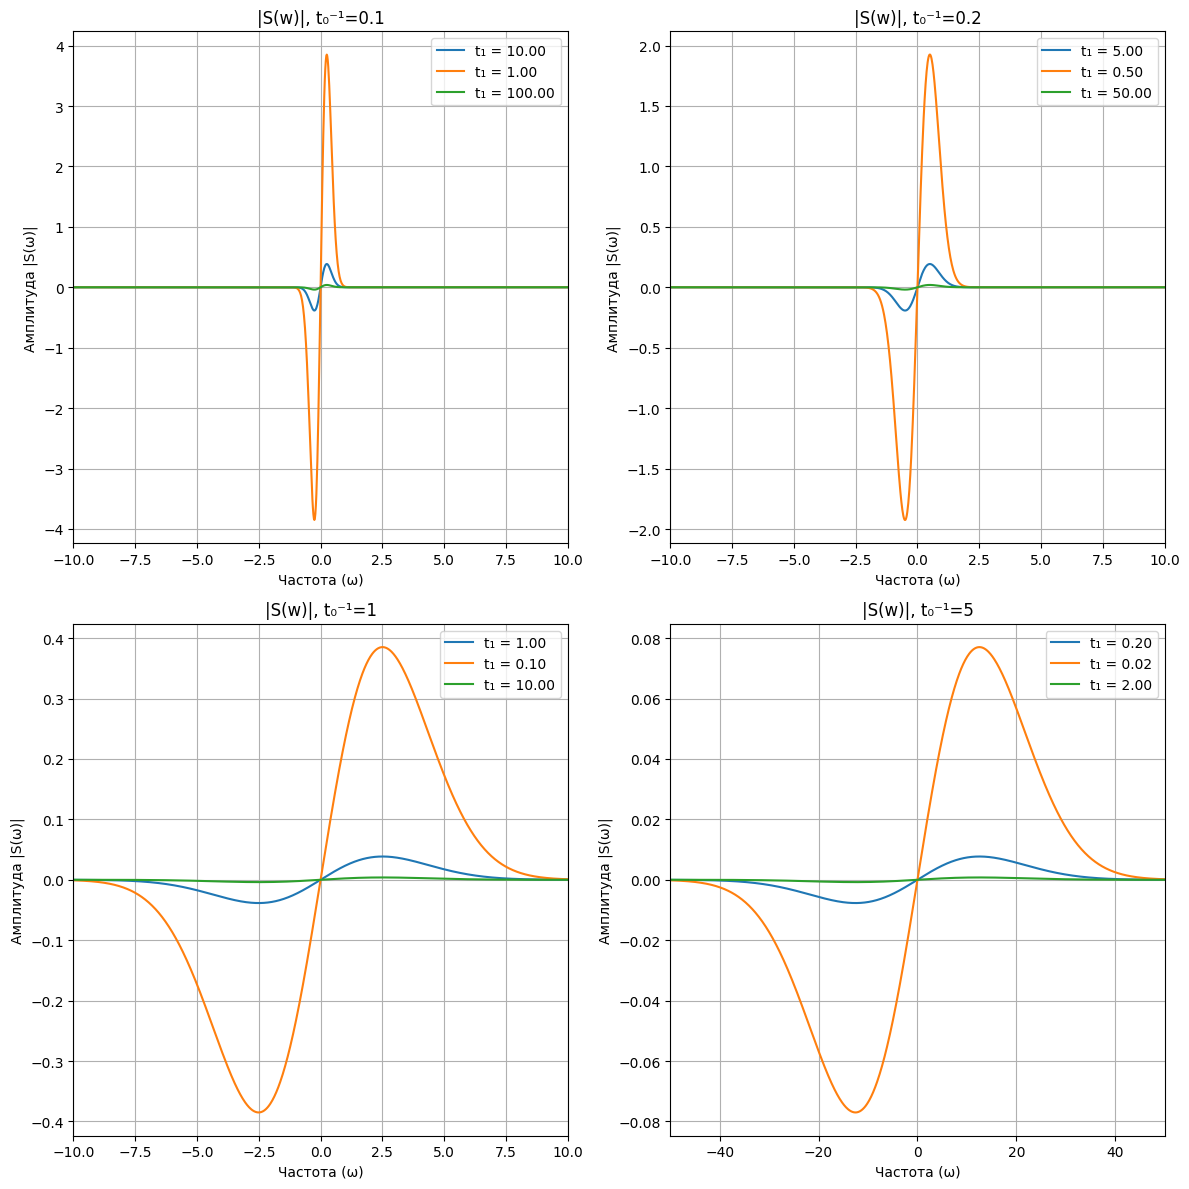

In [36]:
def S(w, t_0, t_1):
    a = 1
    return ((a * w * t_0**3) / (4 * np.pi**2 * t_1)) * np.exp((-(w**2) * t_0**2) / (4 * np.pi))

def plot_s_all(t_0_values, titles, w_range=(-10, 10), save_filename='spectrum_plots.png'):
    plt.figure(figsize=(12, 12))

    for i, (t_0, title) in enumerate(zip(t_0_values, titles)):
        t_1_values = [t_0, 0.1 * t_0, 10 * t_0]
        w = np.linspace(-10, 10, 1000) if i < 3 else np.linspace(-50, 50, 1000)

        plt.subplot(2, 2, i + 1)
        for t_1 in t_1_values:
            s_values = S(w, t_0, t_1)
            plt.plot(w, s_values, label=f't₁ = {t_1:.2f}')

        plt.title(f'|S(w)|, {title}')
        plt.xlabel('Частота (ω)')
        plt.ylabel('Амплитуда |S(ω)|')
        plt.legend()
        plt.grid()

        if i < 3:
            plt.xlim(-10, 10)
        else:
            plt.xlim(-50, 50)

    plt.tight_layout()
    plt.savefig(save_filename, bbox_inches='tight')
    plt.show()

t_0_values = [10.0, 5.0, 1.0, 0.2]
titles = ['t₀⁻¹=0.1', 't₀⁻¹=0.2', 't₀⁻¹=1', 't₀⁻¹=5']

plot_s_all(t_0_values, titles)

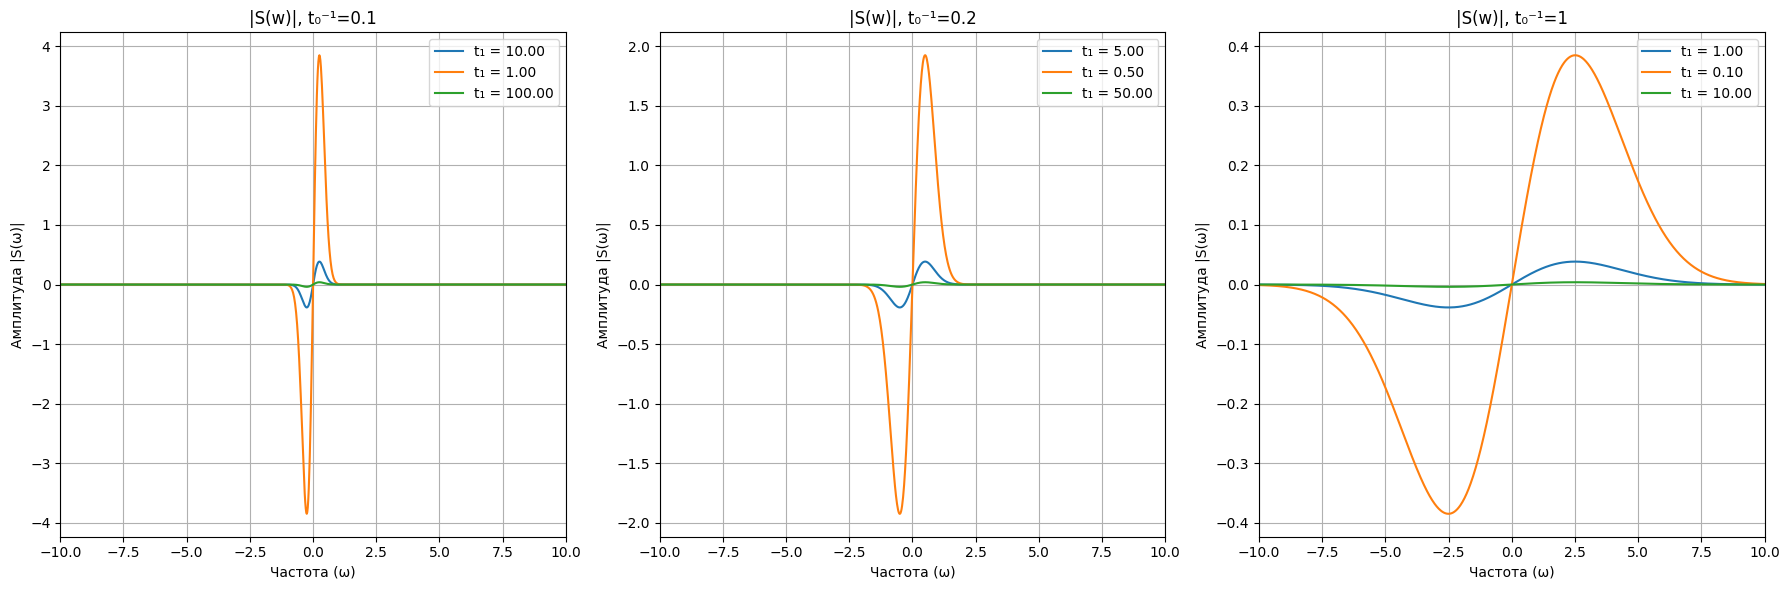

In [37]:
def S(w, t_0, t_1):
    a = 1
    return ((a * w * t_0**3) / (4 * np.pi**2 * t_1)) * np.exp((-(w**2) * t_0**2) / (4 * np.pi))

def plot_s_horizontal(t_0_values, titles, save_filename='spectrum_horizontal.png'):
    plt.figure(figsize=(18, 6))

    for i, (t_0, title) in enumerate(zip(t_0_values[:3], titles[:3])):
        t_1_values = [t_0, 0.1 * t_0, 10 * t_0]
        w = np.linspace(-10, 10, 1000)

        plt.subplot(1, 3, i + 1)
        for t_1 in t_1_values:
            s_values = S(w, t_0, t_1)
            plt.plot(w, s_values, label=f't₁ = {t_1:.2f}')

        plt.title(f'|S(w)|, {title}')
        plt.xlabel('Частота (ω)')
        plt.ylabel('Амплитуда |S(ω)|')
        plt.legend()
        plt.grid()
        plt.xlim(-10, 10)

    plt.tight_layout()
    plt.savefig(save_filename, bbox_inches='tight')
    plt.show()

t_0_values = [10.0, 5.0, 1.0, 0.2]
titles = ['t₀⁻¹=0.1', 't₀⁻¹=0.2', 't₀⁻¹=1', 't₀⁻¹=5']

plot_s_horizontal(t_0_values, titles)

# Ширина спектра

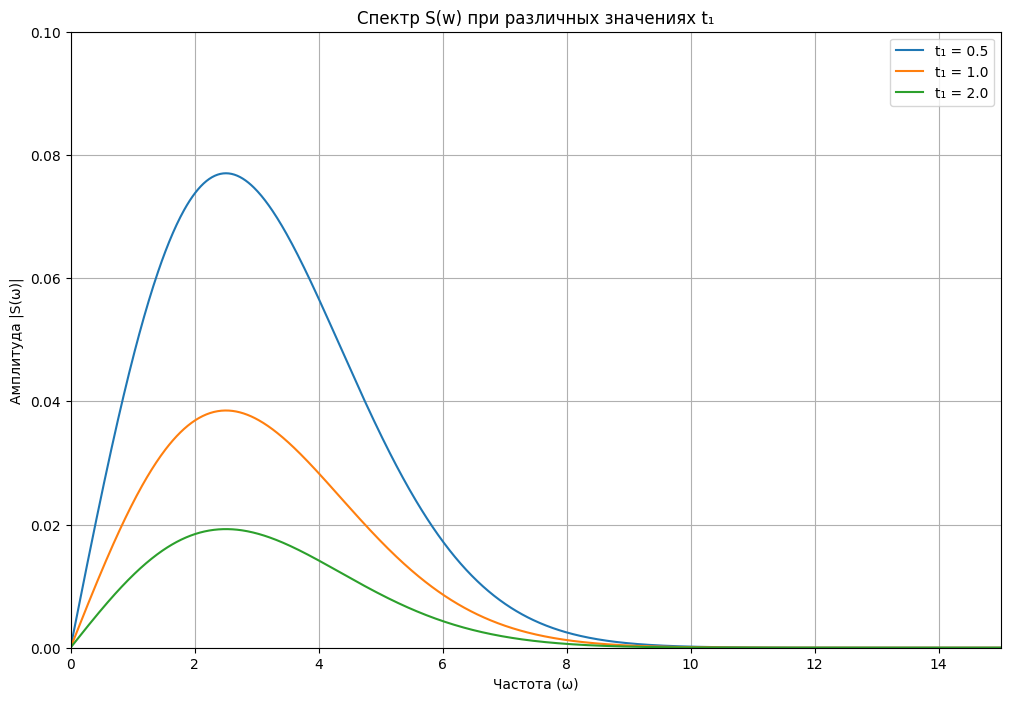

In [38]:
t_0 = 1.0
a = 1.0
omega = np.linspace(0, 15, 1000)

def S(w, t_1):
    return - (1j * w * (t_0**3) * a) / (4 * np.pi**2 * t_1) * np.exp(-(w**2 * (t_0**2)) / (4 * np.pi))

t_1_values = [0.5, 1.0, 2.0]

plt.figure(figsize=(12, 8))

for t_1 in t_1_values:
    s_values = S(omega, t_1)
    plt.plot(omega, np.abs(s_values), label=f't₁ = {t_1}')

plt.title('Спектр S(w) при различных значениях t₁')
plt.xlabel('Частота (ω)')
plt.ylabel('Амплитуда |S(ω)|')
plt.legend()
plt.grid()
plt.xlim(0, 15)
plt.ylim(0, 0.1)
plt.savefig('spectrum_S_w.png', bbox_inches='tight')
plt.show()

# Анализ ширины спектра

## Варьируем $t_1$

### Метод половинной ширины (Full Width at Half Maximum, FWHM)

Находим max амплитуду `max_amplitude`, смотрим, где амплитуда больше или равна половине максимума, ширина определяется как разница между двумя крайними значениями: <br>
`omega_start` — частота, при которой амплитуда начинает превышать половину максимума <br>
`omega_end` — частота, при которой амплитуда снова становится меньше половины максимума.

Для t_1 = 1.0: Ширина спектра Δω = 4.00 (от 0.80 до 4.80)


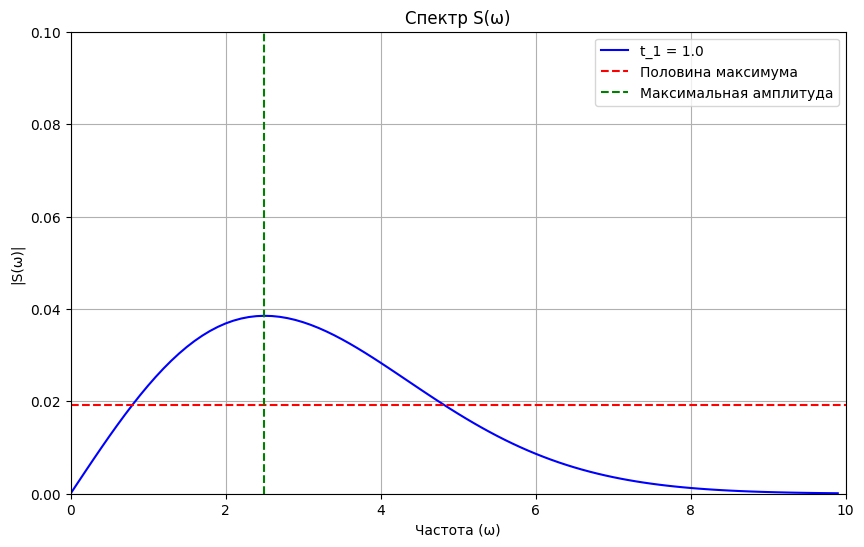

Для t_1 = 5.0: Ширина спектра Δω = 4.00 (от 0.80 до 4.80)


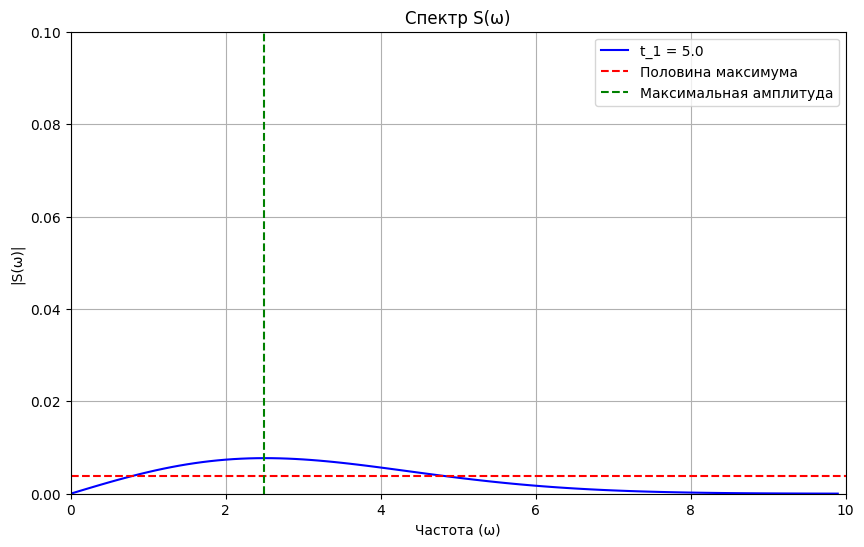

Для t_1 = 10.0: Ширина спектра Δω = 4.00 (от 0.80 до 4.80)


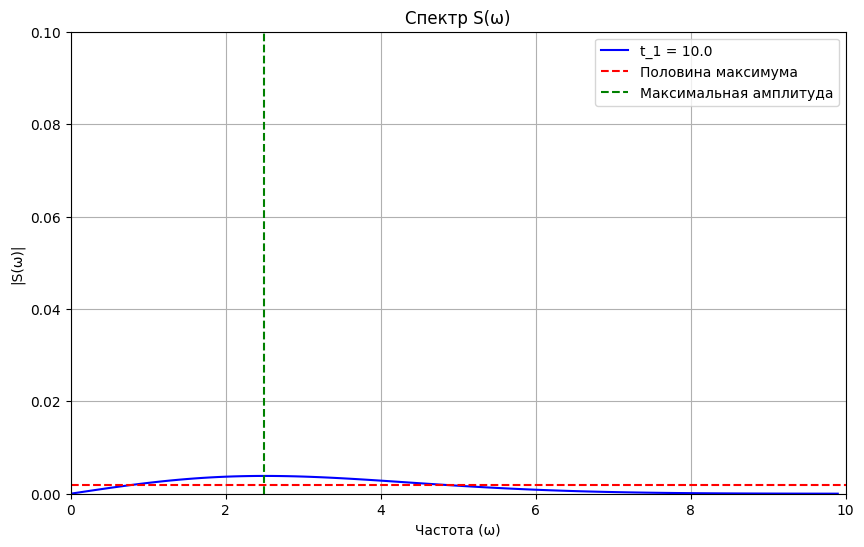

In [39]:
t0 = 1.0
a = 1.0
t_1_values = [1.0, 5.0, 10.0]
omega = np.arange(0, 10, 0.1)

for t_1 in t_1_values:
    S_omega = - (1j * omega * (t0**3) * a) / (4 * np.pi**2 * t_1) * np.exp(-(omega**2 * (t0**2)) / (4 * np.pi))

    amplitude = np.abs(S_omega)

    plt.figure(figsize=(10, 6))
    plt.plot(omega, amplitude, label=f't_1 = {t_1}', color='blue')

    max_amplitude = np.max(amplitude)
    half_max_amplitude = max_amplitude / 2

    plt.axhline(y=half_max_amplitude, color='red', linestyle='--', label='Половина максимума')

    indices = np.where(amplitude >= half_max_amplitude)[0]

    if len(indices) > 0:
        omega_start = omega[indices[0]]
        omega_end = omega[indices[-1]]
        delta_omega = omega_end - omega_start

        print(f'Для t_1 = {t_1}: Ширина спектра Δω = {delta_omega:.2f} (от {omega_start:.2f} до {omega_end:.2f})')

    plt.axvline(x=omega[np.argmax(amplitude)], color='green', linestyle='--', label='Максимальная амплитуда')

    plt.title('Спектр S(ω)')
    plt.xlabel('Частота (ω)')
    plt.ylabel('|S(ω)|')
    plt.grid()
    plt.legend()
    plt.xlim(0, 10)
    plt.ylim(0, 0.1)
    plt.show()

Для t₁ = 1.0: Ширина спектра Δω = 4.00 (от 0.80 до 4.80)
Для t₁ = 5.0: Ширина спектра Δω = 4.00 (от 0.80 до 4.80)
Для t₁ = 10.0: Ширина спектра Δω = 4.00 (от 0.80 до 4.80)


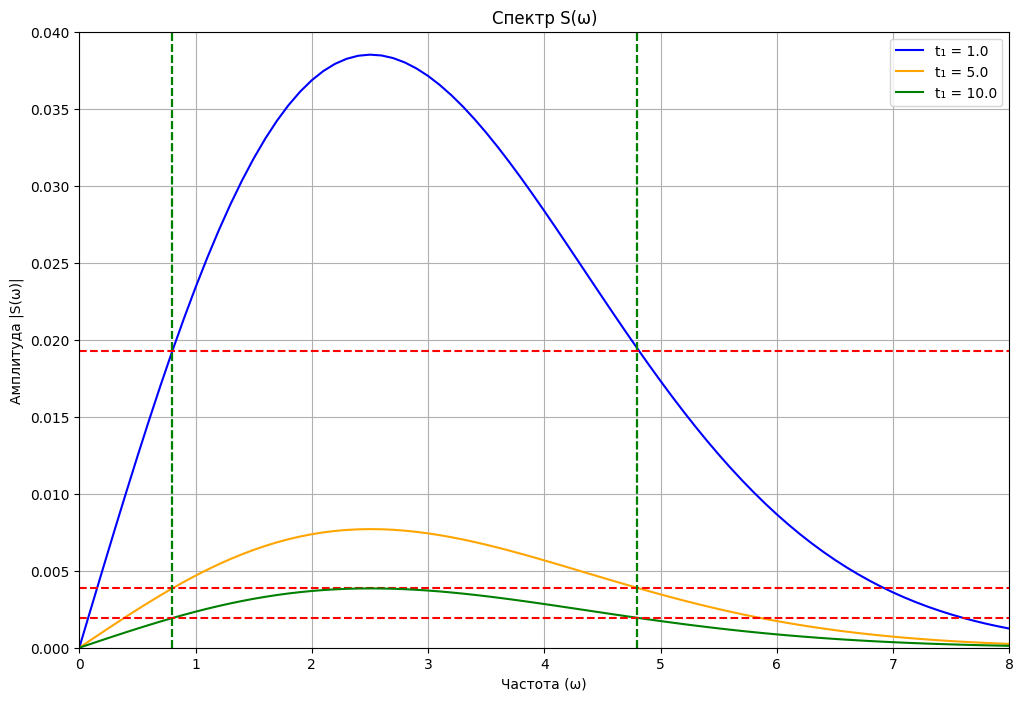

In [40]:
t0 = 1.0
a = 1.0
t_1_values = [1.0, 5.0, 10.0]
omega = np.arange(0, 10, 0.1)

colors = ['blue', 'orange', 'green']

plt.figure(figsize=(12, 8))

for i, t_1 in enumerate(t_1_values):
    S_omega = - (1j * omega * (t0**3) * a) / (4 * np.pi**2 * t_1) * np.exp(-(omega**2 * (t0**2)) / (4 * np.pi))

    amplitude = np.abs(S_omega)

    plt.plot(omega, amplitude, label=f't₁ = {t_1}', color=colors[i])

    max_amplitude = np.max(amplitude)
    half_max_amplitude = max_amplitude / 2

    plt.axhline(y=half_max_amplitude, color='red', linestyle='--')

    indices = np.where(amplitude >= half_max_amplitude)[0]

    if len(indices) > 0:
        omega_start = omega[indices[0]]
        omega_end = omega[indices[-1]]
        delta_omega = omega_end - omega_start

        print(f'Для t₁ = {t_1}: Ширина спектра Δω = {delta_omega:.2f} (от {omega_start:.2f} до {omega_end:.2f})')

        plt.axvline(x=omega[indices[0]], color='green', linestyle='--')
        plt.axvline(x=omega[indices[-1]], color='green', linestyle='--')

plt.title('Спектр S(ω)')
plt.xlabel('Частота (ω)')
plt.ylabel('Амплитуда |S(ω)|')
plt.grid()
plt.legend()
plt.xlim(0, 8)
plt.ylim(0, 0.04)
plt.savefig('spectrum_width_FWHM.png', dpi=300)
plt.show()

### Энергетический метод

Полная энергия сигнала $ E_{\text{total}} = \int |S(\omega)|^2 \, d\omega $

Для t₁ = 1.00: Ширина спектра Δω ≈ 4.40 (содержит ~90% энергии)
Для t₁ = 5.00: Ширина спектра Δω ≈ 4.40 (содержит ~90% энергии)
Для t₁ = 10.00: Ширина спектра Δω ≈ 4.40 (содержит ~90% энергии)


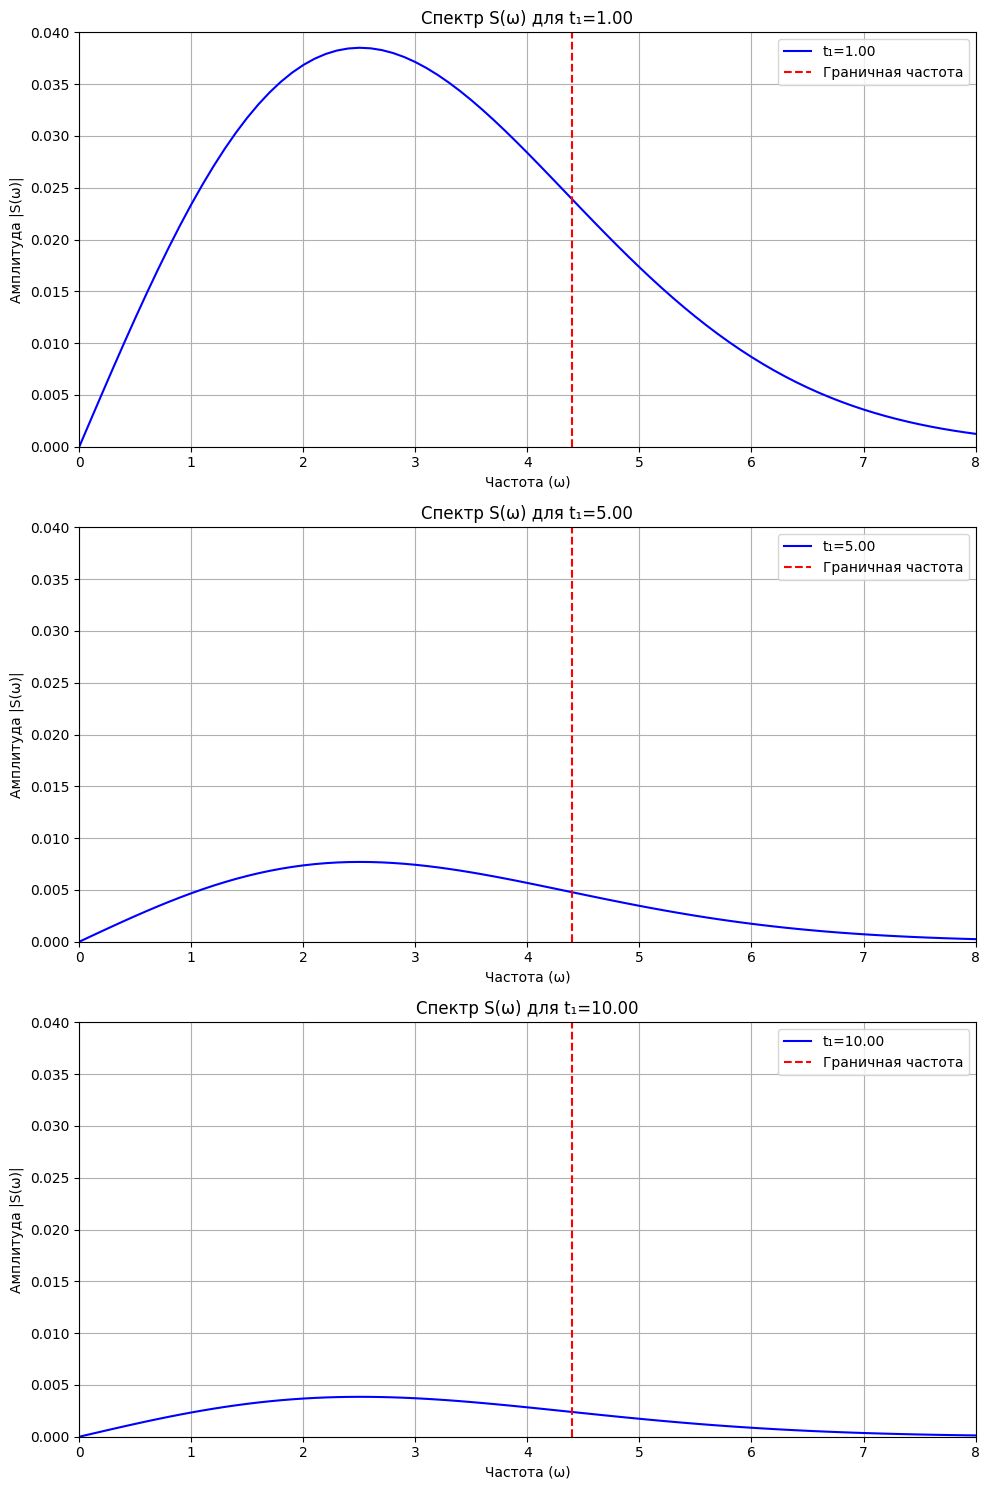

In [41]:
t0 = 1.0
a = 1.0
t_1_values = [1.0, 5.0, 10.0]
omega = np.arange(0, 10, 0.1)

def compute_spectrum(t_0, t_1):
    S_omega = - (1j * omega * (t_0**3) * a) / (4 * np.pi**2 * t_1) * np.exp(-(omega**2 * (t_0**2)) / (4 * np.pi))
    return np.abs(S_omega)

fig, axs = plt.subplots(len(t_1_values), figsize=(10, 15))

for i, t_1 in enumerate(t_1_values):
    amplitude = compute_spectrum(t0, t_1)

    total_energy = np.trapz(amplitude**2, omega)

    cumulative_energy = np.cumsum(amplitude**2) * (omega[1] - omega[0])

    energy_threshold = 0.90 * total_energy
    omega_gr_index = np.where(cumulative_energy >= energy_threshold)[0][0]
    omega_gr = omega[omega_gr_index]

    print(f'Для t₁ = {t_1:.2f}: Ширина спектра Δω ≈ {omega_gr:.2f} (содержит ~90% энергии)')

    axs[i].plot(omega, amplitude, label=f't₁={t_1:.2f}', color='blue')
    axs[i].axvline(x=omega_gr, color='red', linestyle='--', label='Граничная частота')
    axs[i].set_title(f'Спектр S(ω) для t₁={t_1:.2f}')
    axs[i].set_xlabel('Частота (ω)')
    axs[i].set_ylabel('Амплитуда |S(ω)|')
    axs[i].grid()
    axs[i].legend()
    axs[i].set_xlim(0, 8)
    axs[i].set_ylim(0, 0.04)

plt.tight_layout()
plt.savefig('spectrum_width_vertical.png', bbox_inches='tight')
plt.show()

Для t₁ = 0.05: Ширина спектра Δω ≈ 3.82 (содержит ~90% энергии)
Для t₁ = 5.00: Ширина спектра Δω ≈ 3.82 (содержит ~90% энергии)
Для t₁ = 10.00: Ширина спектра Δω ≈ 3.82 (содержит ~90% энергии)


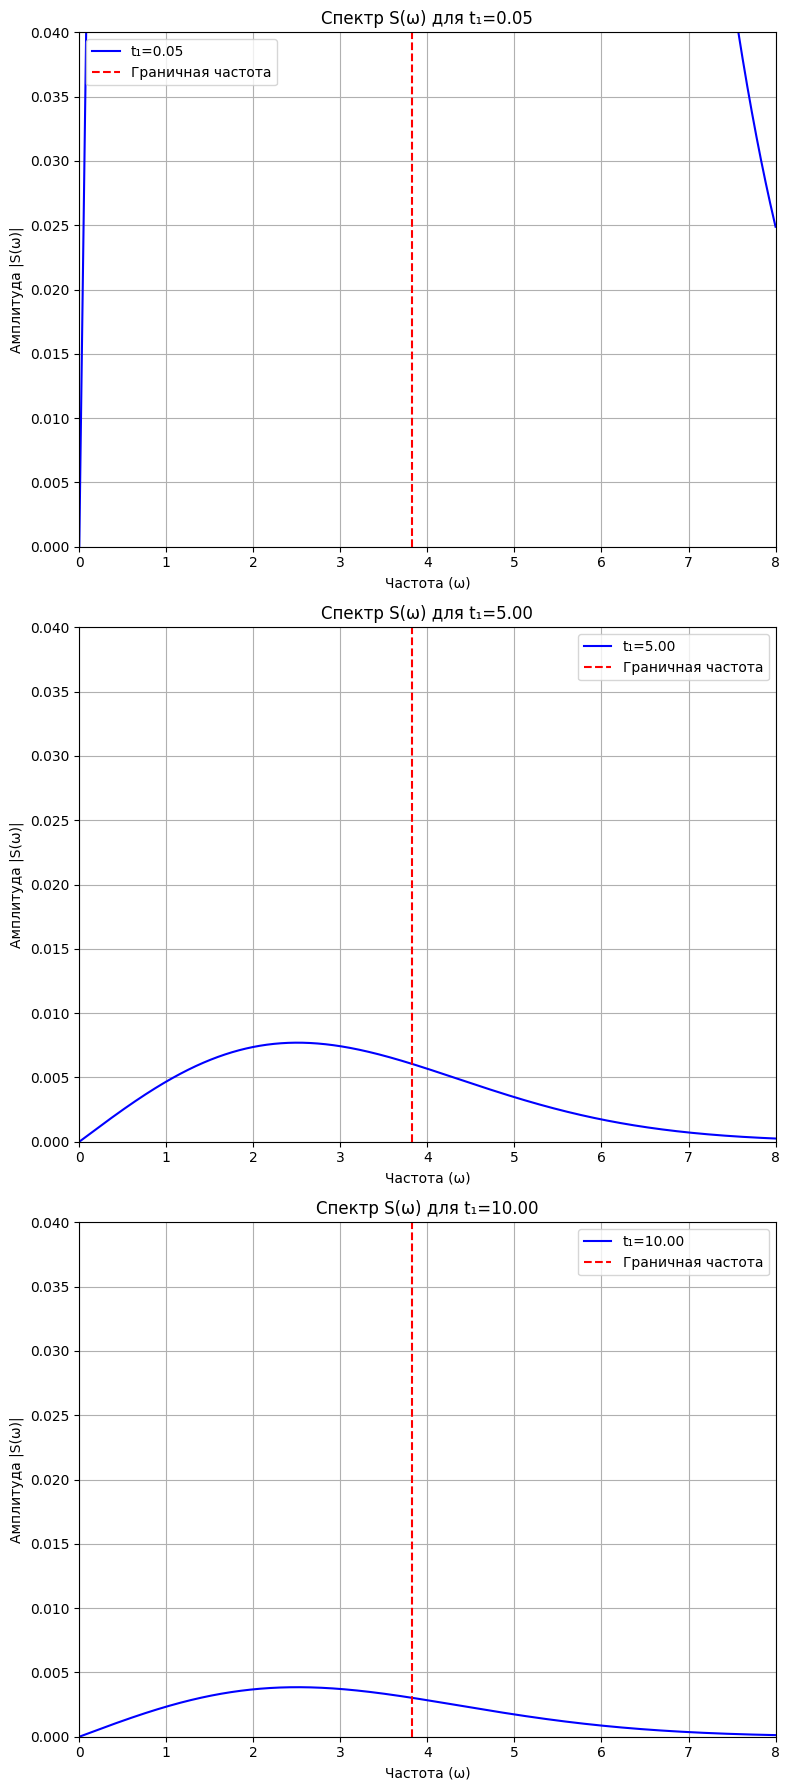

In [42]:
t0 = 1.0
a = 1.0
t_1_values = [0.05, 5.0, 10.0]
omega = np.arange(-1000, 1000, 0.0001)

def compute_spectrum(t_0, t_1):
    S_omega = - (1j * omega * (t_0**3) * a) / (4 * np.pi**2 * t_1) * np.exp(-(omega**2 * (t_0**2)) / (4 * np.pi))
    return np.abs(S_omega)

fig, axs = plt.subplots(len(t_1_values), 1, figsize=(8, 18))

for i, t_1 in enumerate(t_1_values):
    amplitude = compute_spectrum(t0, t_1)

    total_energy = np.trapz(amplitude**2, omega)

    cumulative_energy = np.cumsum(amplitude**2) * (omega[1] - omega[0])

    energy_threshold = 0.90 * total_energy
    omega_gr_index = np.where(cumulative_energy >= energy_threshold)[0][0]
    omega_gr = omega[omega_gr_index]

    print(f'Для t₁ = {t_1:.2f}: Ширина спектра Δω ≈ {omega_gr:.2f} (содержит ~90% энергии)')

    axs[i].plot(omega, amplitude, label=f't₁={t_1:.2f}', color='blue')
    axs[i].axvline(x=omega_gr, color='red', linestyle='--', label='Граничная частота')
    axs[i].set_title(f'Спектр S(ω) для t₁={t_1:.2f}')
    axs[i].set_xlabel('Частота (ω)')
    axs[i].set_ylabel('Амплитуда |S(ω)|')
    axs[i].grid()
    axs[i].legend()
    axs[i].set_xlim(0, 8)
    axs[i].set_ylim(0, 0.04)

plt.tight_layout()
plt.savefig('spectrum_width_vertical_1.png', bbox_inches='tight')
plt.show()

## Варьируем $t_0$

Для t₀ = 0.5: Ширина спектра Δω = 8.00 (от 1.60 до 9.60)
Для t₀ = 1.0: Ширина спектра Δω = 4.00 (от 0.80 до 4.80)
Для t₀ = 2.0: Ширина спектра Δω = 2.00 (от 0.40 до 2.40)


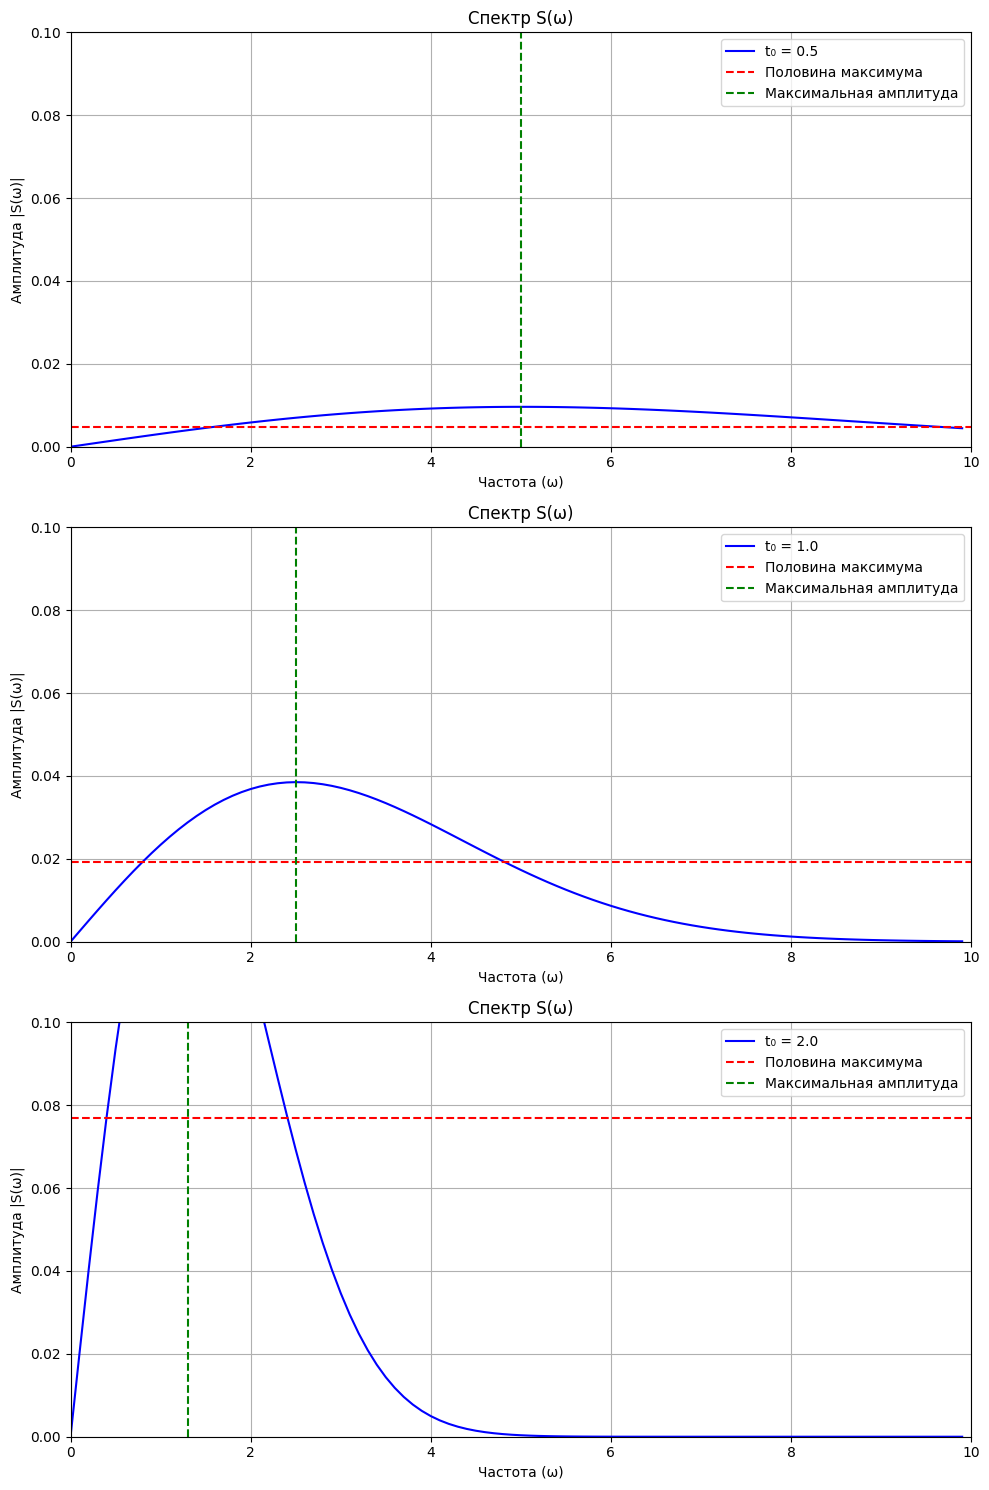

In [43]:
t_1 = 1.0
a = 1.0
t_0_values = [0.5, 1.0, 2.0]
omega = np.arange(0, 10, 0.1)

fig, axs = plt.subplots(len(t_0_values), figsize=(10, 15))

for i, t_0 in enumerate(t_0_values):
    S_omega = - (1j * omega * (t_0**3) * a) / (4 * np.pi**2 * t_1) * np.exp(-(omega**2 * (t_0**2)) / (4 * np.pi))
    amplitude = np.abs(S_omega)

    axs[i].plot(omega, amplitude, label=f't₀ = {t_0}', color='blue')

    max_amplitude = np.max(amplitude)
    half_max_amplitude = max_amplitude / 2

    axs[i].axhline(y=half_max_amplitude, color='red', linestyle='--', label='Половина максимума')

    indices = np.where(amplitude >= half_max_amplitude)[0]

    if len(indices) > 0:
        omega_start = omega[indices[0]]
        omega_end = omega[indices[-1]]
        delta_omega = omega_end - omega_start

        print(f'Для t₀ = {t_0}: Ширина спектра Δω = {delta_omega:.2f} (от {omega_start:.2f} до {omega_end:.2f})')

    axs[i].axvline(x=omega[np.argmax(amplitude)], color='green', linestyle='--', label='Максимальная амплитуда')

    axs[i].set_title('Спектр S(ω)')
    axs[i].set_xlabel('Частота (ω)')
    axs[i].set_ylabel('Амплитуда |S(ω)|')
    axs[i].grid()
    axs[i].legend()
    axs[i].set_xlim(0, 10)
    axs[i].set_ylim(0, 0.1)

plt.tight_layout()
plt.savefig('spectrum_width_vertical_2.png', bbox_inches='tight')
plt.show()